In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("On-street_Parking_Bay_Sensors (2).csv")

In [4]:
data

,bay_id,st_marker_id,status,location,lat,lon
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724
...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514


In [5]:
y = pd.get_dummies(data.status, prefix='status')


In [6]:
data_data = pd.concat([data, y], axis=1, join='inner')
display(data_data)

,bay_id,st_marker_id,status,location,lat,lon,status_Present,status_Unoccupied
0,1399,1581S,Unoccupied,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0,1
1,2242,3930N,Unoccupied,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0,1
2,6092,13251S,Unoccupied,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0,1
3,9064,9278N,Unoccupied,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0,1
4,8979,7891W,Unoccupied,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0,1
...,...,...,...,...,...,...,...,...
948,2643,10117W,Unoccupied,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0,1
949,4422,C7684,Unoccupied,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0,1
950,4086,C6286,Unoccupied,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0,1
951,4069,C6176,Unoccupied,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0,1


In [7]:
data_data.drop(columns=['status_Unoccupied'], axis = 1, inplace = True)

In [8]:
data_data.drop(columns=['status'], axis = 1, inplace = True)

In [9]:
data_data = data_data.rename(columns={'status_Present': 'status'})

In [10]:
data_data

,bay_id,st_marker_id,location,lat,lon,status
0,1399,1581S,"(-37.81865397291395, 144.96367840905828)",-37.818654,144.963678,0
1,2242,3930N,"(-37.81219457073095, 144.9546289525064)",-37.812195,144.954629,0
2,6092,13251S,"(-37.82011525242285, 144.9431517749976)",-37.820115,144.943152,0
3,9064,9278N,"(-37.82897744884528, 144.969902966706)",-37.828977,144.969903,0
4,8979,7891W,"(-37.825247665661855, 144.9707237360832)",-37.825248,144.970724,0
...,...,...,...,...,...,...
948,2643,10117W,"(-37.80331033543291, 144.94795547514428)",-37.803310,144.947955,0
949,4422,C7684,"(-37.80367821515115, 144.95521518472984)",-37.803678,144.955215,0
950,4086,C6286,"(-37.80497529927409, 144.95078932967044)",-37.804975,144.950789,0
951,4069,C6176,"(-37.80373641156282, 144.95251392706675)",-37.803736,144.952514,0


In [11]:
data_data.drop(columns=['bay_id', 'st_marker_id', 'location', 'lat', 'lon'], axis = 1, inplace = True)

In [12]:
data_data

,status
0,0
1,0
2,0
3,0
4,0
...,...
948,0
949,0
950,0
951,0


<Figure size 864x576 with 0 Axes>

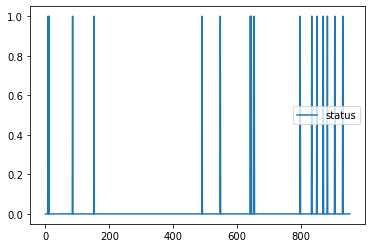

In [13]:
plt.figure(figsize=(12, 8))
data_data.plot();

In [14]:
# Split the dataset into train and test set
train_size = int(data_data.shape[0] * 0.70)
train_df, test_df = data_data.iloc[:train_size, :], data_data.iloc[train_size:, :]

In [15]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    m = len(dataset)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(dataset[i - look_back: i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [16]:
look_back = 1
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
333/333 - 1s - loss: 0.0136
Epoch 2/20
333/333 - 0s - loss: 0.0134
Epoch 3/20
333/333 - 0s - loss: 0.0133
Epoch 4/20
333/333 - 0s - loss: 0.0134
Epoch 5/20
333/333 - 0s - loss: 0.0134
Epoch 6/20
333/333 - 0s - loss: 0.0134
Epoch 7/20
333/333 - 0s - loss: 0.0134
Epoch 8/20
333/333 - 0s - loss: 0.0134
Epoch 9/20
333/333 - 0s - loss: 0.0134
Epoch 10/20
333/333 - 0s - loss: 0.0133
Epoch 11/20
333/333 - 0s - loss: 0.0134
Epoch 12/20
333/333 - 0s - loss: 0.0134
Epoch 13/20
333/333 - 0s - loss: 0.0134
Epoch 14/20
333/333 - 0s - loss: 0.0134
Epoch 15/20
333/333 - 0s - loss: 0.0134
Epoch 16/20
333/333 - 0s - loss: 0.0134
Epoch 17/20
333/333 - 0s - loss: 0.0134
Epoch 18/20
333/333 - 0s - loss: 0.0134
Epoch 19/20
333/333 - 0s - loss: 0.0134
Epoch 20/20
333/333 - 0s - loss: 0.0134


In [19]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train score: {} MSE'.format(train_score))
print('Test score: {} MSE'.format(test_score))

9/9 [==============================] - 0s 1000us/step - loss: 0.0240
Train score: 0.013331293128430843 MSE
Test score: 0.02403607964515686 MSE


In [20]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data_data))

<Figure size 864x576 with 0 Axes>

In [21]:
look_back = 3
X_train, y_train = create_dataset(train_df.values, look_back=look_back)
X_test, y_test = create_dataset(test_df.values, look_back=look_back)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [23]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
332/332 - 1s - loss: 0.0142
Epoch 2/400
332/332 - 0s - loss: 0.0132
Epoch 3/400
332/332 - 0s - loss: 0.0130
Epoch 4/400
332/332 - 0s - loss: 0.0132
Epoch 5/400
332/332 - 0s - loss: 0.0130
Epoch 6/400
332/332 - 0s - loss: 0.0131
Epoch 7/400
332/332 - 0s - loss: 0.0128
Epoch 8/400
332/332 - 0s - loss: 0.0131
Epoch 9/400
332/332 - 0s - loss: 0.0130
Epoch 10/400
332/332 - 0s - loss: 0.0131
Epoch 11/400
332/332 - 0s - loss: 0.0130
Epoch 12/400
332/332 - 0s - loss: 0.0131
Epoch 13/400
332/332 - 0s - loss: 0.0130
Epoch 14/400
332/332 - 0s - loss: 0.0131
Epoch 15/400
332/332 - 0s - loss: 0.0131
Epoch 16/400
332/332 - 0s - loss: 0.0130
Epoch 17/400
332/332 - 0s - loss: 0.0130
Epoch 18/400
332/332 - 0s - loss: 0.0130
Epoch 19/400
332/332 - 0s - loss: 0.0130
Epoch 20/400
332/332 - 0s - loss: 0.0130
Epoch 21/400
332/332 - 0s - loss: 0.0131
Epoch 22/400
332/332 - 0s - loss: 0.0131
Epoch 23/400
332/332 - 0s - loss: 0.0130
Epoch 24/400
332/332 - 0s - loss: 0.0131
Epoch 25/400
332/332 - 0s

In [24]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train score: {} MSE'.format(train_score))
print('Test score: {} MSE'.format(test_score))

9/9 [==============================] - 0s 2ms/step - loss: 0.0254
Train score: 0.012777404859662056 MSE
Test score: 0.02542746067047119 MSE


In [25]:
test_prediction = model.predict(X_test)
test_prediction

array([[0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.01383304],
       [0.013

In [26]:
test_prediction[test_prediction > 0.2] = 1

In [27]:
test_prediction[test_prediction < 0.2] = 0

In [28]:
accuracy_score(y_test, test_prediction)

0.950530035335689

In [29]:
from sklearn import metrics

In [30]:
print(metrics.mean_absolute_error(y_test, test_prediction))

0.049469966


In [31]:
print(metrics.mean_squared_error(y_test, test_prediction))

0.049469966


In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test, test_prediction)))

0.22241844


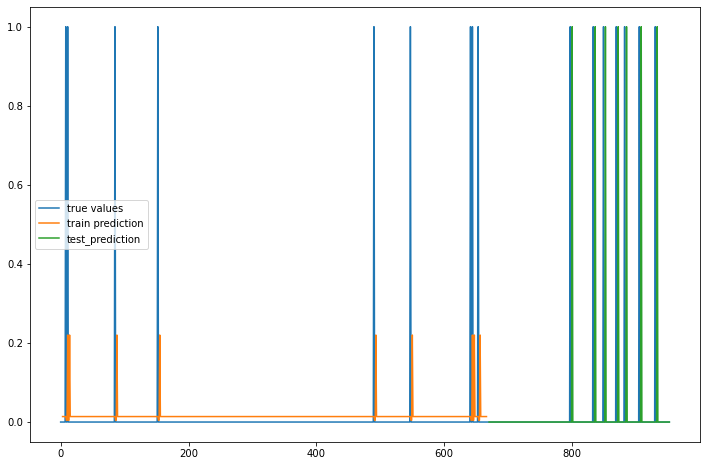

In [33]:
# Visualize the prediction
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
#test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data_data))
plt.plot(data_data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();
